# Split dataset

In [ ]:
# The following code further divides the images of training and annotations
# into test and training dataset
'''
import os, random, shutil

# from fileDir to tarDir
def moveFile(fileDir, tarDir):
    pathDir = os.listdir(fileDir)    
    filenumber=len(pathDir)
    # Proportion of images extracted
    rate=0.1    
    picknumber=int(filenumber*rate) 
    sample = random.sample(pathDir, picknumber)  
    print (sample)
    for name in sample:
            shutil.move(fileDir+name, tarDir+name)
    return



if __name__ == '__main__':

    fileDir = 'D:/DL/ADEChallengeData2016/images/training/'    
    tarDir = 'D:/DL/ADEChallengeData2016/images/test/'    
    annTrain = 'D:/DL/ADEChallengeData2016/annotations/training/'
    annTar = 'D:/DL/ADEChallengeData2016/annotations/test/'
    #moveFile(fileDir, tarDir)

    g = os.walk(r"D:/DL/ADEChallengeData2016/images/test/")

    for path,dir_list,file_list in g:
        for file_name in file_list:
            finalPath = os.path.join(path, file_name)
            #print(finalPath)
            imageName = file_name.replace('jpg' , 'png')
            #print(imageName)
            shutil.move(annTrain+imageName, annTar+imageName)
'''

#!unzip -uq "drive/My Drive/DL-ADEChallengeData2016.zip" -d "drive/My Drive/DL"
#drive.flush_and_unmount()


'\nimport os, random, shutil\n\n# from fileDir to tarDir\ndef moveFile(fileDir, tarDir):\n    pathDir = os.listdir(fileDir)    \n    filenumber=len(pathDir)\n    # Proportion of images extracted\n    rate=0.1    \n    picknumber=int(filenumber*rate) \n    sample = random.sample(pathDir, picknumber)  \n    print (sample)\n    for name in sample:\n            shutil.move(fileDir+name, tarDir+name)\n    return\n\n\n\nif __name__ == \'__main__\':\n\n    fileDir = \'D:/DL/ADEChallengeData2016/images/training/\'    \n    tarDir = \'D:/DL/ADEChallengeData2016/images/test/\'    \n    annTrain = \'D:/DL/ADEChallengeData2016/annotations/training/\'\n    annTar = \'D:/DL/ADEChallengeData2016/annotations/test/\'\n    #moveFile(fileDir, tarDir)\n\n    g = os.walk(r"D:/DL/ADEChallengeData2016/images/test/")\n\n    for path,dir_list,file_list in g:\n        for file_name in file_list:\n            finalPath = os.path.join(path, file_name)\n            #print(finalPath)\n            imageName = file_n

# Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
# You might not have tqdm, which gives you nice progress bars

from tqdm.notebook import tqdm
import os
import copy
import pandas as pd
import PIL 

from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data
import glob

In [ ]:
folder_path = "drive/My Drive/DL/DL-ADEChallengeData2016/"
split = "training"

In [ ]:
import torch.utils.data as data
import glob
import cv2
import numpy as np

class DataLoaderSegmentation(data.Dataset):
    def __init__(self, folder_path, split="training"):
        super(DataLoaderSegmentation, self).__init__()
        self.img_files = sorted(glob.glob(os.path.join(folder_path,'images', split, '*.jpg')))
        self.mask_files =  sorted(glob.glob(os.path.join(folder_path,'annotations', split, '*.png')))

    def __getitem__(self, index):
        img_path = self.img_files[index]
        mask_path = self.mask_files[index]
        
        image = PIL.Image.open(img_path)
        mask = PIL.Image.open(mask_path)
        
        image = np.asarray(transforms.Resize([512,512])(image))
        image = transforms.ToTensor()(np.array(image))
        mask = np.asarray(transforms.Resize([512,512])(mask))
        mask = mask.astype(np.int64)
        # if (image.shape[0] == 1):
        #   image = np.stack((image,)*3, axis=0)
        return image, torch.from_numpy(mask)#torch.from_numpy(data).float(), torch.from_numpy(label).float()

    def __len__(self):
        return len(self.img_files)//2
     

In [ ]:
train_data = DataLoaderSegmentation(folder_path)
train_data_loader = DataLoader(train_data, batch_size=8, shuffle=False, num_workers = 4)
print(len(train_data_loader))  

1137


In [ ]:
validation_data = DataLoaderSegmentation(folder_path, split="validation")
validation_data_loader = DataLoader(validation_data, batch_size=8, shuffle=False, num_workers = 4)
print(len(validation_data_loader))

In [ ]:
img, seg = next(iter(test_data_loader))
print("Batch size of image:", img.shape)
print("Batch size of annotation:", seg.shape)

Batch size of image: torch.Size([8, 3, 512, 512])
Batch size of annotation: torch.Size([8, 512, 512])


# Show sample images

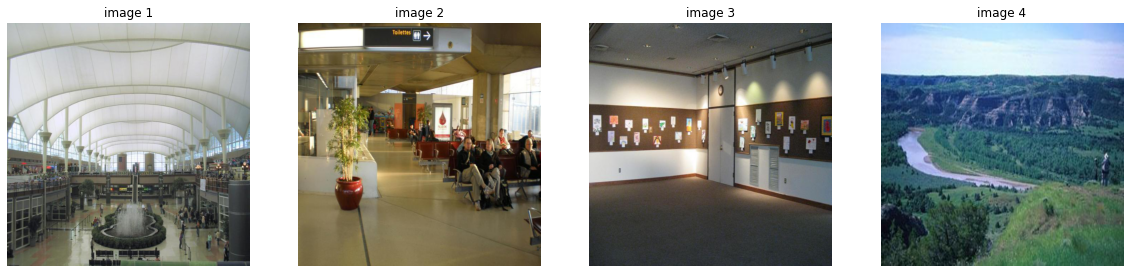

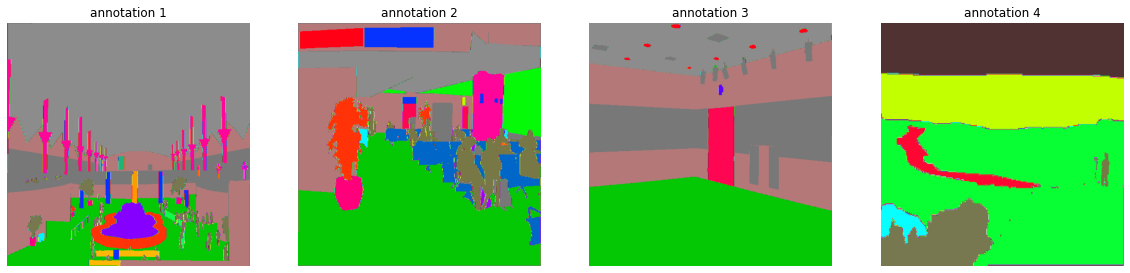

In [ ]:
Mask = torch.tensor([
        [120, 120, 120], [180, 120, 120], [6, 230, 230], [80, 50, 50], [4, 200, 3], [120, 120, 80], [140, 140, 140], [204, 5, 255],
        [230, 230, 230], [4, 250, 7], [224, 5, 255], [235, 255, 7], [150, 5, 61], [120, 120, 70], [8, 255, 51], [255, 6, 82],
        [143, 255, 140], [204, 255, 4], [255, 51, 7], [204, 70, 3], [0, 102, 200], [61, 230, 250], [255, 6, 51], [11, 102, 255],
        [255, 7, 71], [255, 9, 224], [9, 7, 230], [220, 220, 220], [255, 9, 92], [112, 9, 255], [8, 255, 214], [7, 255, 224],
        [255, 184, 6], [10, 255, 71], [255, 41, 10], [7, 255, 255], [224, 255, 8], [102, 8, 255], [255, 61, 6], [255, 194, 7],
        [255, 122, 8], [0, 255, 20], [255, 8, 41], [255, 5, 153], [6, 51, 255], [235, 12, 255], [160, 150, 20], [0, 163, 255],
        [140, 140, 140], [250, 10, 15], [20, 255, 0], [31, 255, 0], [255, 31, 0], [255, 224, 0], [153, 255, 0], [0, 0, 255],
        [255, 71, 0], [0, 235, 255], [0, 173, 255], [31, 0, 255], [11, 200, 200], [255, 82, 0], [0, 255, 245], [0, 61, 255],
        [0, 255, 112], [0, 255, 133], [255, 0, 0], [255, 163, 0], [255, 102, 0], [194, 255, 0], [0, 143, 255], [51, 255, 0],
        [0, 82, 255], [0, 255, 41], [0, 255, 173], [10, 0, 255], [173, 255, 0], [0, 255, 153], [255, 92, 0], [255, 0, 255],
        [255, 0, 245], [255, 0, 102], [255, 173, 0], [255, 0, 20], [255, 184, 184], [0, 31, 255], [0, 255, 61], [0, 71, 255],
        [255, 0, 204], [0, 255, 194], [0, 255, 82], [0, 10, 255], [0, 112, 255], [51, 0, 255], [0, 194, 255], [0, 122, 255],
        [0, 255, 163], [255, 153, 0], [0, 255, 10], [255, 112, 0], [143, 255, 0], [82, 0, 255], [163, 255, 0], [255, 235, 0],
        [8, 184, 170], [133, 0, 255], [0, 255, 92], [184, 0, 255], [255, 0, 31], [0, 184, 255], [0, 214, 255], [255, 0, 112],
        [92, 255, 0], [0, 224, 255], [112, 224, 255], [70, 184, 160], [163, 0, 255], [153, 0, 255], [71, 255, 0], [255, 0, 163],
        [255, 204, 0], [255, 0, 143], [0, 255, 235], [133, 255, 0], [255, 0, 235], [245, 0, 255], [255, 0, 122], [255, 245, 0],
        [10, 190, 212], [214, 255, 0], [0, 204, 255], [20, 0, 255], [255, 255, 0], [0, 153, 255], [0, 41, 255], [0, 255, 204],
        [41, 0, 255], [41, 255, 0], [173, 0, 255], [0, 245, 255], [71, 0, 255], [122, 0, 255], [0, 255, 184], [0, 92, 255],
        [184, 255, 0], [0, 133, 255], [255, 214, 0], [25, 194, 194], [102, 255, 0], [92, 0, 255], [30, 180, 120]
])
def visualize_sample_image(batch_img, batch_seg, n):
  fig, ax = plt.subplots(1, n, figsize=(20,10))
  i=0
  for ax in ax.ravel():
    # break when no more axes left
    if ax is None:
        break
    ax.imshow(batch_img[i,:,:,:].permute((1,2,0)))
    ax.axis('off')
    ax.set_title('image {}'.format(i+1))
    i += 1

  fig, ax = plt.subplots(1, n, figsize=(20,10))
  i=0
  for ax in ax.ravel():
    if ax is None:
        break
    seg_mask = np.zeros((512,512,3))
    for k in range(512):
      for j  in range(512):
        seg_mask[k,j,:] = Mask[batch_seg[i,k,j].item()]/255.0
    ax.imshow(seg_mask)
    ax.axis('off')
    ax.set_title('annotation {}'.format(i+1))
    i += 1

visualize_sample_image(img,seg,4)      


# Model_Unet

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
from torch import cat, nn, squeeze
import cv2
import numpy as np
import torchvision
import warnings
warnings.filterwarnings("ignore")

def get_encoder(model, pretrained=True):
    if model == "resnet18":
        encoder = torchvision.models.resnet18(pretrained=pretrained)
    elif model == "resnet34":
        encoder = torchvision.models.resnet34(pretrained=pretrained)
    elif model == "resnet50":
        encoder = torchvision.models.resnet50(pretrained=pretrained)
    elif model == "resnext50":
        encoder = torchvision.models.resnext50_32x4d(pretrained=pretrained)
    elif model == "resnext101":
        encoder = torchvision.models.resnext101_32x8d(pretrained=pretrained)
        
    if model in ["resnet18", "resnet34"]: 
        model = "resnet18-34"
    else: 
        model = "resnet50-101"
        
    filters_dict = {
        "resnet18-34": [512, 512, 256, 128, 64],
        "resnet50-101": [2048, 2048, 1024, 512, 256]
    }

    return encoder, filters_dict[model]


class ConvRelu(nn.Module):
    def __init__(self, in_: int, out: int, activate=True, batch_norm=False):
        super(ConvRelu, self).__init__()
        self.activate = activate
        self.batch_norm = batch_norm
        self.bn = nn.BatchNorm2d(out)
        self.conv = nn.Conv2d(in_, out, 3, padding=1)
        self.activation = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        if self.batch_norm:
            x = self.bn(x)
        if self.activate:
            x = self.activation(x)
        return x

class ResidualBlock(nn.Module):
    
    def __init__(self, in_channels: int, num_filters: int, batch_norm=True):
        super(ResidualBlock, self).__init__()
        self.batch_norm = batch_norm
        self.bn = nn.BatchNorm2d(num_filters)
        self.activation = nn.ReLU(inplace=True)
        self.conv_block = ConvRelu(in_channels, num_filters, activate=True, batch_norm=True)
        self.conv_block_na = ConvRelu(in_channels, num_filters, activate=False, batch_norm=True)
        
    def forward(self, inp):
        x = self.conv_block(inp)
        x = self.conv_block_na(x)
        if self.batch_norm:
            x = self.bn(x)
        x = x.add(inp)
        x = self.activation(x)
        return x

class DecoderBlockResNet(nn.Module):
    """
    Paramaters for Deconvolution were chosen to avoid artifacts, following
    https://distill.pub/2016/deconv-checkerboard/
    About residual blocks:  
    http://torch.ch/blog/2016/02/04/resnets.html
    """

    def __init__(self, in_channels, middle_channels, out_channels, res_blocks_dec=False):
        super(DecoderBlockResNet, self).__init__()
        self.in_channels = in_channels
        self.res_blocks_dec = res_blocks_dec

        layers_list = [ConvRelu(in_channels, middle_channels, activate=True, batch_norm=False)]
        
        if self.res_blocks_dec:
            layers_list.append(ResidualBlock(middle_channels, middle_channels, batch_norm=True))
        
        layers_list.append(nn.ConvTranspose2d(middle_channels, out_channels, kernel_size=4, stride=2, padding=1))
        if not self.res_blocks_dec:
            layers_list.append(nn.ReLU(inplace=True))
        
        self.block = nn.Sequential(*layers_list)

    def forward(self, x):
        return self.block(x)

class UnetResNet(nn.Module):

    def __init__(self, input_channels=3, num_classes=1, num_filters=32, res_blocks_dec=False,
                 Dropout=.2, encoder_name="resnet50", pretrained=True):
        
        super().__init__()

        self.encoder, self.filters_dict = get_encoder(encoder_name, pretrained)
        self.num_classes = num_classes
        self.Dropout = Dropout
        self.res_blocks_dec = res_blocks_dec
        self.input_channels = input_channels
        
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU(inplace=True)
        if self.input_channels != 3:
            self.channel_tuner = nn.Conv2d(input_channels, 3, kernel_size=1)
        
        self.conv1 = nn.Sequential(self.encoder.conv1,
        self.encoder.bn1,
        self.encoder.relu,
        self.pool)
        self.conv2 = self.encoder.layer1
        self.conv3 = self.encoder.layer2
        self.conv4 = self.encoder.layer3
        self.conv5 = self.encoder.layer4
        
        self.center = DecoderBlockResNet(self.filters_dict[0], num_filters * 8 * 2, 
                                         num_filters * 8, res_blocks_dec=False)
        self.dec5 = DecoderBlockResNet(self.filters_dict[1] + num_filters * 8, 
                                       num_filters * 8 * 2, num_filters * 8, res_blocks_dec=self.res_blocks_dec)    
        self.dec4 = DecoderBlockResNet(self.filters_dict[2] + num_filters * 8, 
                                       num_filters * 8 * 2, num_filters * 8, res_blocks_dec=self.res_blocks_dec)
        self.dec3 = DecoderBlockResNet(self.filters_dict[3] + num_filters * 8, 
                                       num_filters * 4 * 2, num_filters * 2, res_blocks_dec=self.res_blocks_dec)
        self.dec2 = DecoderBlockResNet(self.filters_dict[4] + num_filters * 2, 
                                       num_filters * 2 * 2, num_filters * 2 * 2, res_blocks_dec=self.res_blocks_dec)
        
        self.dec1 = DecoderBlockResNet(num_filters * 2 * 2, num_filters * 2 * 2, num_filters, res_blocks_dec=False)
        self.dec0 = ConvRelu(num_filters, num_filters)
        
        self.final = nn.Conv2d(num_filters, num_classes, kernel_size=1)
        self.dropout_2d = nn.Dropout2d(p=self.Dropout)

    def forward(self, x, z=None):
        if self.input_channels != 3:
            x = self.channel_tuner(x)
        
        conv1 = self.conv1(x)
        conv2 = self.dropout_2d(self.conv2(conv1))
        conv3 = self.dropout_2d(self.conv3(conv2))
        conv4 = self.dropout_2d(self.conv4(conv3))
        conv5 = self.dropout_2d(self.conv5(conv4))

        center = self.center(self.pool(conv5))
        # add features into the bottleneck layer
        # f_repeat = torch.cat([torch.empty((1,1,)+(center.size()[2:])).fill_(z[i]) for i in range(z.size()[0])])
        # center = torch.cat([center, f_repeat], 1)
        
        dec5 = self.dec5(cat([center, conv5], 1))
        dec4 = self.dec4(cat([dec5, conv4], 1))
        dec3 = self.dec3(cat([dec4, conv3], 1))
        dec2 = self.dec2(cat([dec3, conv2], 1))
        dec2 = self.dropout_2d(dec2)

        dec1 = self.dec1(dec2)
        dec0 = self.dec0(dec1)

        return self.final(dec0)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = UnetResNet(encoder_name="resnet34", 
                           num_classes=151, 
                           input_channels=3, 
                           num_filters=32, 
                           Dropout=0.3).to(device)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
loss_function = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), learning_rate)

def adjust_learning_rate(optimizer, epoch, learning_rate):
    learning_rate = learning_rate * (0.1 ** (epoch // 30))
    for param_group in optimizer.param_groups:
        param_group['lr'] = learning_rate

In [ ]:
epoch_save_train_inf_for_colab = 5  
save_model_path_colab = "/content/drive/My Drive/DL/latest_model/"

In [ ]:
import torch
num_epoch = 40
best_loss = 1000
best_metric_epoch = -1
epoch_loss_values = []
val_loss_values = []

train_step = len(train_data_loader)
val_step = len(validation_data_loader)

model.zero_grad()
for epoch in range(num_epoch):
    print("-" * num_epoch)
    print(f"epoch {epoch + 1}/{num_epoch}")
    adjust_learning_rate(optimizer, epoch, learning_rate)
    model.train()
    epoch_loss = 0
    step = 0
    for img, mask in tqdm(train_data_loader):
        # step += 1
        img = img.to(device)
        mask = mask.to(device)
        optimizer.zero_grad()
        outputs = model(img)
        loss = loss_function(outputs, mask)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_len = train_step
    epoch_loss /= train_step
    epoch_loss_values.append(epoch_loss)
    print(f"epoch {epoch + 1} average loss: {epoch_loss:.4f}")

    model.eval()
    with torch.no_grad():
        # evaludate the validation set
        val_loss = 0
        for val_data in tqdm(validation_data_loader):
            val_images, val_labels = val_data[0].to(device), val_data[1].to(device)
            val_outputs = model(val_images)
            loss = loss_function(val_outputs, val_labels)
            val_loss += loss.item()
        val_loss /= val_step
        val_loss_values.append(val_loss)
        if val_loss < best_loss:
          best_loss = val_loss
          best_metric_epoch = epoch + 1
          torch.save(model.state_dict(), "drive/My Drive/DL/best_unet_model.pth")
          print("new best metric model saved")
        print("current epoch: {} current loss: {:.4f} best loss: {:.4f} at epoch {}".format(epoch + 1, val_loss, best_loss, best_metric_epoch))
    
    if epoch > 30:
        epoch_save_train_inf_for_colab = 3
    if epoch % epoch_save_train_inf_for_colab == int(epoch_save_train_inf_for_colab-1):
        state = { 
                    'model': model.state_dict(), 
                    'optimizer':optimizer.state_dict(), 
                    'epoch': epoch,
                    #    'train_loss':epoch_loss,
                    #    'train_acc':epoch_acc,
                    'val_loss':val_loss,
                    'best_loss':best_loss,
                    'best_metric_epoch':best_metric_epoch,
                    'epoch_loss_values':epoch_loss_values,
                    'val_loss_values':val_loss_values
                    }
        # save_model_path_colab="/content/drive/My Drive/colab notebooks/output/"   
        # save_model_path_colab_new=os.path.join(save_model_path_colab,
        #                                         f'{epoch}_{i:06}_loss{loss}.pt')
        torch.save(state,save_model_path_colab+"best_unet_model.pth")
        print('save train model at ', save_model_path_colab+"best_unet_model.pth","from colab")
  

----------------------------------------
epoch 1/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 1 average loss: 3.2571


  0%|          | 0/125 [00:00<?, ?it/s]

new best metric model saved
current epoch: 1 current loss: 2.9786 best loss: 2.9786 at epoch 1
----------------------------------------
epoch 2/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 2 average loss: 2.8312


  0%|          | 0/125 [00:00<?, ?it/s]

new best metric model saved
current epoch: 2 current loss: 2.7752 best loss: 2.7752 at epoch 2
----------------------------------------
epoch 3/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 3 average loss: 2.6204


  0%|          | 0/125 [00:00<?, ?it/s]

new best metric model saved
current epoch: 3 current loss: 2.5765 best loss: 2.5765 at epoch 3
----------------------------------------
epoch 4/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 4 average loss: 2.4718


  0%|          | 0/125 [00:00<?, ?it/s]

new best metric model saved
current epoch: 4 current loss: 2.3750 best loss: 2.3750 at epoch 4
----------------------------------------
epoch 5/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 5 average loss: 2.3753


  0%|          | 0/125 [00:00<?, ?it/s]

new best metric model saved
current epoch: 5 current loss: 2.2874 best loss: 2.2874 at epoch 5
save train model at  /content/drive/My Drive/DL/latest_model/best_unet_model.pth from colab
----------------------------------------
epoch 6/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 6 average loss: 2.3142


  0%|          | 0/125 [00:00<?, ?it/s]

new best metric model saved
current epoch: 6 current loss: 2.2601 best loss: 2.2601 at epoch 6
----------------------------------------
epoch 7/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 7 average loss: 2.2439


  0%|          | 0/125 [00:00<?, ?it/s]

current epoch: 7 current loss: 2.2922 best loss: 2.2601 at epoch 6
----------------------------------------
epoch 8/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 8 average loss: 2.2029


  0%|          | 0/125 [00:00<?, ?it/s]

current epoch: 8 current loss: 2.2750 best loss: 2.2601 at epoch 6
----------------------------------------
epoch 9/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 9 average loss: 2.1573


  0%|          | 0/125 [00:00<?, ?it/s]

new best metric model saved
current epoch: 9 current loss: 2.1301 best loss: 2.1301 at epoch 9
----------------------------------------
epoch 10/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 10 average loss: 2.1125


  0%|          | 0/125 [00:00<?, ?it/s]

new best metric model saved
current epoch: 10 current loss: 2.0816 best loss: 2.0816 at epoch 10
save train model at  /content/drive/My Drive/DL/latest_model/best_unet_model.pth from colab
----------------------------------------
epoch 11/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 11 average loss: 2.0679


  0%|          | 0/125 [00:00<?, ?it/s]

new best metric model saved
current epoch: 11 current loss: 2.0303 best loss: 2.0303 at epoch 11
----------------------------------------
epoch 12/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 12 average loss: 2.0396


  0%|          | 0/125 [00:00<?, ?it/s]

current epoch: 12 current loss: 2.0397 best loss: 2.0303 at epoch 11
----------------------------------------
epoch 13/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 13 average loss: 2.0084


  0%|          | 0/125 [00:00<?, ?it/s]

current epoch: 13 current loss: 2.1061 best loss: 2.0303 at epoch 11
----------------------------------------
epoch 14/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 14 average loss: 1.9732


  0%|          | 0/125 [00:00<?, ?it/s]

new best metric model saved
current epoch: 14 current loss: 1.9627 best loss: 1.9627 at epoch 14
----------------------------------------
epoch 15/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 15 average loss: 1.9485


  0%|          | 0/125 [00:00<?, ?it/s]

current epoch: 15 current loss: 1.9696 best loss: 1.9627 at epoch 14
save train model at  /content/drive/My Drive/DL/latest_model/best_unet_model.pth from colab
----------------------------------------
epoch 16/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 16 average loss: 1.9233


  0%|          | 0/125 [00:00<?, ?it/s]

new best metric model saved
current epoch: 16 current loss: 1.9231 best loss: 1.9231 at epoch 16
----------------------------------------
epoch 17/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 17 average loss: 1.8919


  0%|          | 0/125 [00:00<?, ?it/s]

new best metric model saved
current epoch: 17 current loss: 1.9149 best loss: 1.9149 at epoch 17
----------------------------------------
epoch 18/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 18 average loss: 1.8687


  0%|          | 0/125 [00:00<?, ?it/s]

current epoch: 18 current loss: 1.9208 best loss: 1.9149 at epoch 17
----------------------------------------
epoch 19/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 19 average loss: 1.8452


  0%|          | 0/125 [00:00<?, ?it/s]

current epoch: 19 current loss: 1.9189 best loss: 1.9149 at epoch 17
----------------------------------------
epoch 20/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 20 average loss: 1.8370


  0%|          | 0/125 [00:00<?, ?it/s]

new best metric model saved
current epoch: 20 current loss: 1.9091 best loss: 1.9091 at epoch 20
save train model at  /content/drive/My Drive/DL/latest_model/best_unet_model.pth from colab
----------------------------------------
epoch 21/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 21 average loss: 1.8094


  0%|          | 0/125 [00:00<?, ?it/s]

new best metric model saved
current epoch: 21 current loss: 1.8503 best loss: 1.8503 at epoch 21
----------------------------------------
epoch 22/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 22 average loss: 1.7894


  0%|          | 0/125 [00:00<?, ?it/s]

current epoch: 22 current loss: 1.9106 best loss: 1.8503 at epoch 21
----------------------------------------
epoch 23/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 23 average loss: 1.7721


  0%|          | 0/125 [00:00<?, ?it/s]

current epoch: 23 current loss: 1.8815 best loss: 1.8503 at epoch 21
----------------------------------------
epoch 24/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 24 average loss: 1.7505


  0%|          | 0/125 [00:00<?, ?it/s]

new best metric model saved
current epoch: 24 current loss: 1.8245 best loss: 1.8245 at epoch 24
----------------------------------------
epoch 25/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 25 average loss: 1.7377


  0%|          | 0/125 [00:00<?, ?it/s]

current epoch: 25 current loss: 1.8527 best loss: 1.8245 at epoch 24
save train model at  /content/drive/My Drive/DL/latest_model/best_unet_model.pth from colab
----------------------------------------
epoch 26/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 26 average loss: 1.7180


  0%|          | 0/125 [00:00<?, ?it/s]

new best metric model saved
current epoch: 26 current loss: 1.8099 best loss: 1.8099 at epoch 26
----------------------------------------
epoch 27/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 27 average loss: 1.6904


  0%|          | 0/125 [00:00<?, ?it/s]

new best metric model saved
current epoch: 27 current loss: 1.7950 best loss: 1.7950 at epoch 27
----------------------------------------
epoch 28/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 28 average loss: 1.6849


  0%|          | 0/125 [00:00<?, ?it/s]

new best metric model saved
current epoch: 28 current loss: 1.7948 best loss: 1.7948 at epoch 28
----------------------------------------
epoch 29/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 29 average loss: 1.6722


  0%|          | 0/125 [00:00<?, ?it/s]

new best metric model saved
current epoch: 29 current loss: 1.7882 best loss: 1.7882 at epoch 29
----------------------------------------
epoch 30/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 30 average loss: 1.6508


  0%|          | 0/125 [00:00<?, ?it/s]

current epoch: 30 current loss: 1.8057 best loss: 1.7882 at epoch 29
save train model at  /content/drive/My Drive/DL/latest_model/best_unet_model.pth from colab
----------------------------------------
epoch 31/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 31 average loss: 1.5391


  0%|          | 0/125 [00:00<?, ?it/s]

new best metric model saved
current epoch: 31 current loss: 1.7007 best loss: 1.7007 at epoch 31
----------------------------------------
epoch 32/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 32 average loss: 1.5019


  0%|          | 0/125 [00:00<?, ?it/s]

new best metric model saved
current epoch: 32 current loss: 1.6942 best loss: 1.6942 at epoch 32
----------------------------------------
epoch 33/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 33 average loss: 1.4844


  0%|          | 0/125 [00:00<?, ?it/s]

new best metric model saved
current epoch: 33 current loss: 1.6861 best loss: 1.6861 at epoch 33
save train model at  /content/drive/My Drive/DL/latest_model/best_unet_model.pth from colab
----------------------------------------
epoch 34/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 34 average loss: 1.4736


  0%|          | 0/125 [00:00<?, ?it/s]

current epoch: 34 current loss: 1.6959 best loss: 1.6861 at epoch 33
----------------------------------------
epoch 35/40


  0%|          | 0/1137 [00:00<?, ?it/s]

## Reload model

In [ ]:


save_model_path_colab = "/content/drive/My Drive/DL/latest_model/"
save_path = save_model_path_colab + "best_unet_model.pth"
checkpoint = torch.load(save_path)
model.load_state_dict(checkpoint['model'])
optimizer.load_state_dict(checkpoint['optimizer'])
start_epoch = checkpoint['epoch']

val_loss  = checkpoint['val_loss']
best_loss = checkpoint['best_loss']
best_metric_epoch = checkpoint['best_metric_epoch']
epoch_loss_values = checkpoint['epoch_loss_values']
val_loss_values = checkpoint['val_loss_values']

print("Finish epoch turn: {}, Epoch index: {}, Now val_loss：{:.4f} and best_loss：{:}".format(start_epoch+1,start_epoch,val_loss,best_loss))


Finish epoch turn: 33, Epoch index: 32, Now val_loss：1.6861 and best_loss：1.6861193046569825


In [ ]:
# Parameter
num_epoch = 40
train_step = len(train_data_loader)
val_step = len(validation_data_loader)
epoch_save_train_inf_for_colab = 5 

## main function:
model.zero_grad()
for epoch in range(start_epoch+1,num_epoch):
    print("-" * num_epoch)
    print(f"epoch {epoch + 1}/{num_epoch}")
    adjust_learning_rate(optimizer, epoch, learning_rate)
    model.train()
    epoch_loss = 0
    step = 0
    for img, mask in tqdm(train_data_loader):
        # step += 1
        img = img.to(device)
        mask = mask.to(device)
        optimizer.zero_grad()
        outputs = model(img)
        loss = loss_function(outputs, mask)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_len = train_step
    epoch_loss /= train_step
    epoch_loss_values.append(epoch_loss)
    print(f"epoch {epoch + 1} average loss: {epoch_loss:.4f}")

    model.eval()
    with torch.no_grad():
        # evaludate the validation set
        val_loss = 0
        for val_data in tqdm(validation_data_loader):
            val_images, val_labels = val_data[0].to(device), val_data[1].to(device)
            val_outputs = model(val_images)
            loss = loss_function(val_outputs, val_labels)
            val_loss += loss.item()
        val_loss /= val_step
        val_loss_values.append(val_loss)
        if val_loss < best_loss:
          best_loss = val_loss
          best_metric_epoch = epoch + 1
          torch.save(model.state_dict(), "drive/My Drive/DL/best_unet_model.pth")
          print("new best metric model saved")
        print("current epoch: {} current loss: {:.4f} best loss: {:.4f} at epoch {}".format(epoch + 1, val_loss, best_loss, best_metric_epoch))
    
    if epoch > 30:
        epoch_save_train_inf_for_colab = 3
    if epoch % epoch_save_train_inf_for_colab == int(epoch_save_train_inf_for_colab-1):
        state = { 
                    'model': model.state_dict(), 
                    'optimizer':optimizer.state_dict(), 
                    'epoch': epoch,
                    #    'train_loss':epoch_loss,
                    #    'train_acc':epoch_acc,
                    'val_loss':val_loss,
                    'best_loss':best_loss,
                    'best_metric_epoch':best_metric_epoch,
                    'epoch_loss_values':epoch_loss_values,
                    'val_loss_values':val_loss_values
                    }
        # save_model_path_colab="/content/drive/My Drive/colab notebooks/output/"   
        # save_model_path_colab_new=os.path.join(save_model_path_colab,
        #                                         f'{epoch}_{i:06}_loss{loss}.pt')
        torch.save(state,save_model_path_colab+"best_unet_model.pth")
        print('save train model at ', save_model_path_colab+"best_unet_model.pth","from colab")
  

----------------------------------------
epoch 34/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 34 average loss: 1.4738


  0%|          | 0/125 [00:00<?, ?it/s]

current epoch: 34 current loss: 1.7040 best loss: 1.6861 at epoch 33
----------------------------------------
epoch 35/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 35 average loss: 1.4602


  0%|          | 0/125 [00:00<?, ?it/s]

new best metric model saved
current epoch: 35 current loss: 1.6851 best loss: 1.6851 at epoch 35
----------------------------------------
epoch 36/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 36 average loss: 1.4540


  0%|          | 0/125 [00:00<?, ?it/s]

current epoch: 36 current loss: 1.6926 best loss: 1.6851 at epoch 35
save train model at  /content/drive/My Drive/DL/latest_model/best_unet_model.pth from colab
----------------------------------------
epoch 37/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 37 average loss: 1.4446


  0%|          | 0/125 [00:00<?, ?it/s]

new best metric model saved
current epoch: 37 current loss: 1.6849 best loss: 1.6849 at epoch 37
----------------------------------------
epoch 38/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 38 average loss: 1.4351


  0%|          | 0/125 [00:00<?, ?it/s]

current epoch: 38 current loss: 1.6886 best loss: 1.6849 at epoch 37
----------------------------------------
epoch 39/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 39 average loss: 1.4274


  0%|          | 0/125 [00:00<?, ?it/s]

current epoch: 39 current loss: 1.7021 best loss: 1.6849 at epoch 37
save train model at  /content/drive/My Drive/DL/latest_model/best_unet_model.pth from colab
----------------------------------------
epoch 40/40


  0%|          | 0/1137 [00:00<?, ?it/s]

epoch 40 average loss: 1.4187


  0%|          | 0/125 [00:00<?, ?it/s]

current epoch: 40 current loss: 1.6926 best loss: 1.6849 at epoch 37


##Results

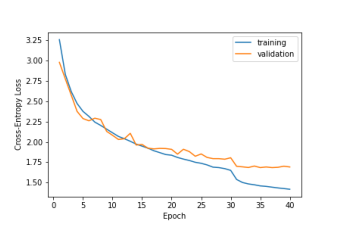

In [ ]:
# plot training loss and validation loss
import matplotlib.pyplot as plt
def plot_train_val_loss(epoch_loss_values, val_loss_values, file_name):
    plt.plot(np.arange(len(epoch_loss_values))+1, epoch_loss_values, label = "training")
    plt.xlabel("Epoch")
    # plt.ylabel("Training Cross-Entropy Loss")
    plt.plot(np.arange(len(val_loss_values))+1, val_loss_values, label = "validation")
    plt.xlabel("Epoch")
    plt.ylabel("Cross-Entropy Loss")
    # plt.title("Validation")
    plt.legend()
    plt.savefig(fname = file_name)
plot_train_val_loss(epoch_loss_values, val_loss_values, "drive/My Drive/DL/latest_model/pretrained-Unet")

In [ ]:
model.load_state_dict(torch.load("drive/My Drive/DL/best_unet_model.pth"))

<All keys matched successfully>

In [ ]:
test_data = DataLoaderSegmentation(folder_path, split="test")
test_data_loader = DataLoader(test_data, batch_size=8, shuffle=False, num_workers = 4)
model.eval()
img_test, seg_test = next(iter(train_data_loader))

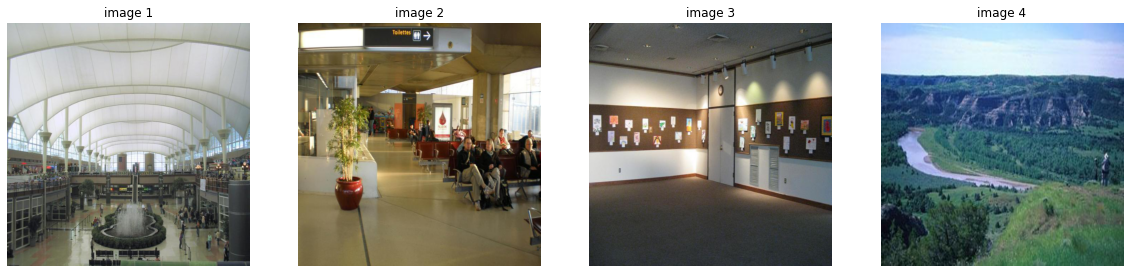

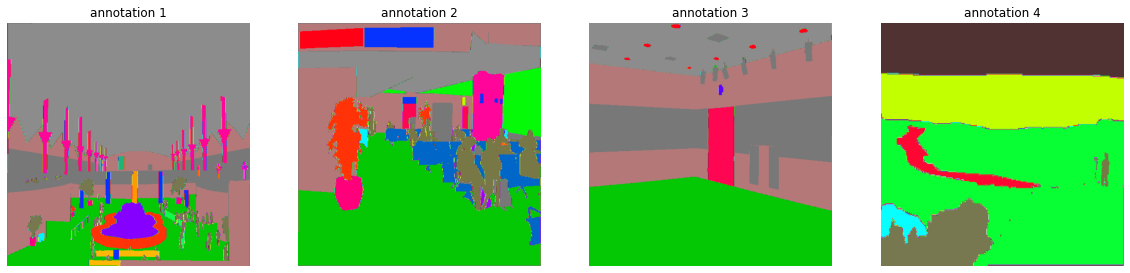

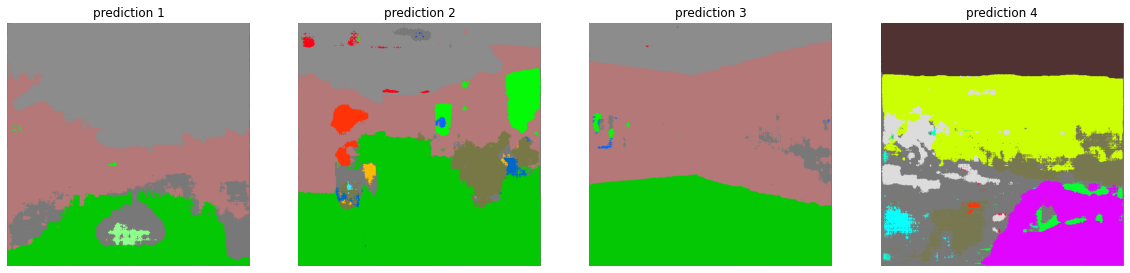

In [ ]:
def visualize_prediction_n(batch_img, batch_seg, n, model):
  model.eval()
  visualize_sample_image(batch_img,batch_seg,n)
  fig, ax = plt.subplots(1, n, figsize=(20,10))
  model.eval()
  with torch.no_grad():
    prediction_raw = model(img_test.to(device))
    prediction = np.argmax(prediction_raw.cpu(), axis = 1)
    i=0
    for ax in ax.ravel():
      if ax is None:
        break
      pre_mask = np.zeros((512,512,3))
      for k in range(512):
        for j  in range(512):
          pre_mask[k,j,:] = Mask[prediction[i,k,j].item()]/255.0
      ax.imshow(pre_mask)
      ax.axis('off')
      ax.set_title('prediction {}'.format(i+1))
      i += 1
    plt.savefig("unet_pre_pred.png")
visualize_prediction_n(img_test, seg_test, 4, model)

In [ ]:
class AverageMeter(object):
    def __init__(self):
        self.initialized = False
        self.val = None
        self.avg = None
        self.sum = None
        self.count = None

    def initialize(self, val, weight):
        self.val = val
        self.avg = val
        self.sum = val * weight
        self.count = weight
        self.initialized = True

    def update(self, val, weight=1):
        if not self.initialized:
            self.initialize(val, weight)
        else:
            self.add(val, weight)

    def add(self, val, weight):
        self.val = val
        self.sum += val * weight
        self.count += weight
        self.avg = self.sum / self.count

    def value(self):
        return self.val

    def average(self):
        return self.avg

In [ ]:
def intersectionAndUnion(imPred, imLab, numClass):
    imPred = np.asarray(imPred).copy()
    imLab = np.asarray(imLab).copy()

    imPred += 1
    imLab += 1
    imPred = imPred * (imLab > 0)

    # Compute area intersection:
    intersection = imPred * (imPred == imLab)
    (area_intersection, _) = np.histogram(
        intersection, bins=numClass, range=(1, numClass))

    # Compute area union:
    (area_pred, _) = np.histogram(imPred, bins=numClass, range=(1, numClass))
    (area_lab, _) = np.histogram(imLab, bins=numClass, range=(1, numClass))
    area_union = area_pred + area_lab - area_intersection

    return (area_intersection, area_union)
     

In [ ]:
### Read weight for different class
fileobj = open("drive/My Drive/DL/objectInfo150.txt")
line = fileobj.readline()
weightclass = [0.0725]
line = fileobj.readline()
while line: 
    for i in range(len(line)):
        if line[i] == "\t":
            tmp = line[i+1:i+7]
            weight_i = float(tmp)
            weightclass.append(weight_i)
            break            
    line = fileobj.readline()
weightclass = np.array(weightclass)

In [ ]:
def accuracy(preds, label):
    valid = (label >= 0)
    acc_sum = (valid * (preds == label)).sum()
    valid_sum = valid.sum()
    acc = float(acc_sum) / (valid_sum + 1e-10)
    return acc, valid_sum
def evaluate(segmentation_module, loader, weightclass):
    acc_meter = AverageMeter()
    intersection_meter = AverageMeter()
    union_meter = AverageMeter()
    intersection_meter_50 = AverageMeter()
    union_meter_50 = AverageMeter()

    segmentation_module.eval()

    for img, seg in tqdm(validation_data_loader):
        # get the prediction here
        pred = model(img.to(device))
        pred = pred.detach().cpu()
        pred = np.argmax(pred, axis = 1)

        # calculate accuracy
        acc, pix = accuracy(pred, seg)
        intersection, union = intersectionAndUnion(pred, seg, 151)
        acc_meter.update(acc, pix)
        intersection_meter.update(intersection)
        union_meter.update(union)
        intersection_meter_50.update(intersection[0:50])
        union_meter_50.update(union[0:50])


    # summary
    iou = intersection_meter.sum / (union_meter.sum + 1e-10)
    iou_50 = intersection_meter_50.sum / (union_meter_50.sum + 1e-10)
    wiou = weightclass*np.array(iou)
    f= open("drive/My Drive/DL/latest_model/iou_baseline.txt","w+")
    for i, _iou in enumerate(iou):
      print('class [{}], IoU: {:.4f}'.format(i, _iou))
      f.write('{}, {:.4f}'.format(i, _iou))
      f.write('\n')

    f.write('[Eval Summary]:')
    f.write('Mean IoU: {:.4f}, Mean IoU first 50 classes: {:.4f}, Weighted IoU: {:.4f}, Accuracy: {:.4f}%'
          .format(iou.mean(), iou_50.mean(), np.sum(wiou), acc_meter.average()*100))

evaluate(model, test_data_loader, weightclass)